# 排序

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from plotnine import *

## Lollipop


In [ ]:
mpg = pd.read_csv("data/mpg.csv")
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [ ]:
mpg_group = mpg.loc[:, ["cty", "manufacturer"]].groupby("manufacturer").mean("city")
mpg_group.head()

,cty
manufacturer,
audi,17.611111
chevrolet,15.000000
dodge,13.135135
ford,14.000000
honda,24.444444


In [ ]:
mpg_group = mpg_group.sort_values("cty")
mpg_group = mpg_group.reset_index()
mpg_group.head()

,manufacturer,cty
0,lincoln,11.333333
1,land rover,11.500000
2,dodge,13.135135
3,mercury,13.250000
4,jeep,13.500000


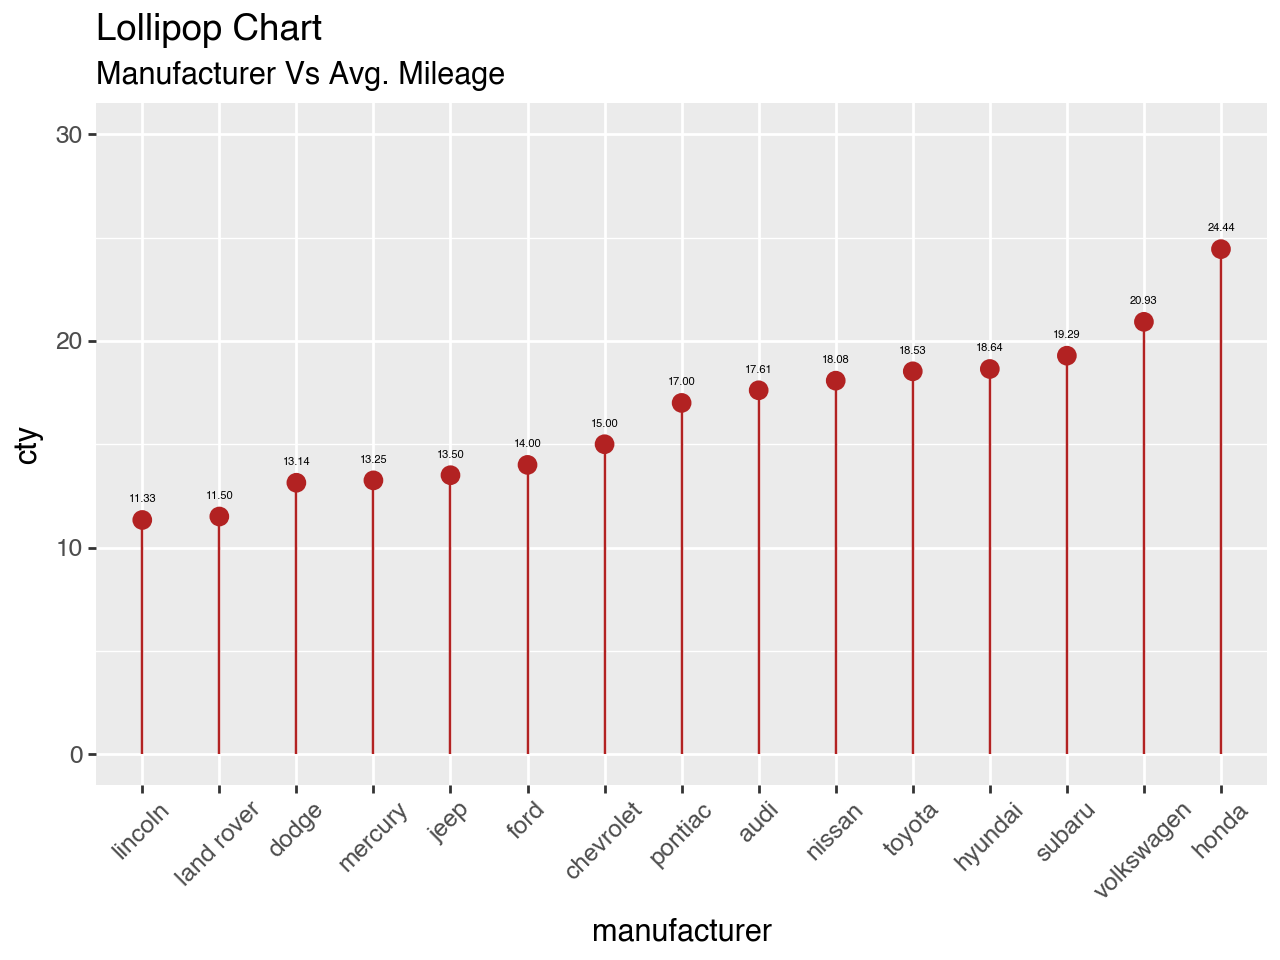

In [ ]:
(
    ggplot(mpg_group, aes(x="manufacturer", y="cty", label="cty"))
    + geom_point(size=3, color="firebrick")
    + geom_segment(
        aes(x="manufacturer", xend="manufacturer", y=0, yend="cty"), color="firebrick"
    )
    + geom_text(color="black", size=4, nudge_y=1, format_string="{:.2f}")
    + labs(title="Lollipop Chart", subtitle="Manufacturer Vs Avg. Mileage")
    + scale_x_discrete(limits=mpg_group.manufacturer)
    + theme(axis_text_x=element_text(angle=45, vjust=1))
    + ylim(0, 30)
)

## Slope


In [ ]:
gdp = pd.read_csv("data/gdp_per_cap.csv")
gdp.head()

,continent,1952,1957
0,Africa,1252.572466,1385.236062
1,Americas,4079.062552,4616.043733
2,Asia,5195.484004,4003.132940
3,Europe,5661.057435,6963.012816
4,Oceania,10298.085650,11598.522455


In [ ]:
gdp_new = gdp.melt(
    id_vars=["continent"],
    value_vars=["1952", "1957"],
    var_name="time",
    value_name="total",
    ignore_index=False,
)
gdp_new["continent"] = gdp_new["continent"].astype("category")
gdp_new

,continent,time,total
0,Africa,1952,1252.572466
1,Americas,1952,4079.062552
2,Asia,1952,5195.484004
3,Europe,1952,5661.057435
4,Oceania,1952,10298.085650
0,Africa,1957,1385.236062
1,Americas,1957,4616.043733
2,Asia,1957,4003.132940
3,Europe,1957,6963.012816
4,Oceania,1957,11598.522455


/var/folders/py/n14256yd5r5ddms88x9bvsv40000gn/T/ipykernel_22591/2730543565.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


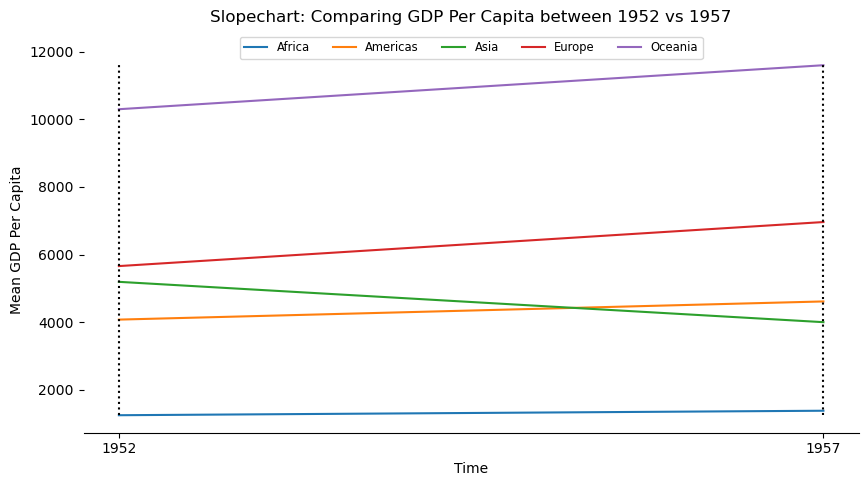

In [ ]:
_, ax = plt.subplots(figsize=(10, 5))

gdp_new.groupby("continent").plot.line(x="time", y="total", ax=ax)

for i in [0, 1]:
    ax.vlines(
        x=i,
        ymin=gdp_new["total"].min(),
        ymax=gdp_new["total"].max(),
        colors="k",
        linestyle="dotted",
    )

ax.set(
    xlabel="Time",
    ylabel="Mean GDP Per Capita",
    title="Slopechart: Comparing GDP Per Capita between 1952 vs 1957\n",
    xticks=[0, 1],
    xticklabels=["1952", "1957"],
)

ax.spines[["right", "top", "left"]].set_visible(False)

ax.legend(
    gdp_new["continent"].unique(),
    loc="center",
    bbox_to_anchor=(0.5, 1),
    ncol=len(gdp_new["continent"].unique()),
    fontsize="small",
)
plt.show()

In [ ]:
gdp["class"] = np.where(gdp["1957"] - gdp["1952"] < 0, "red", "green")

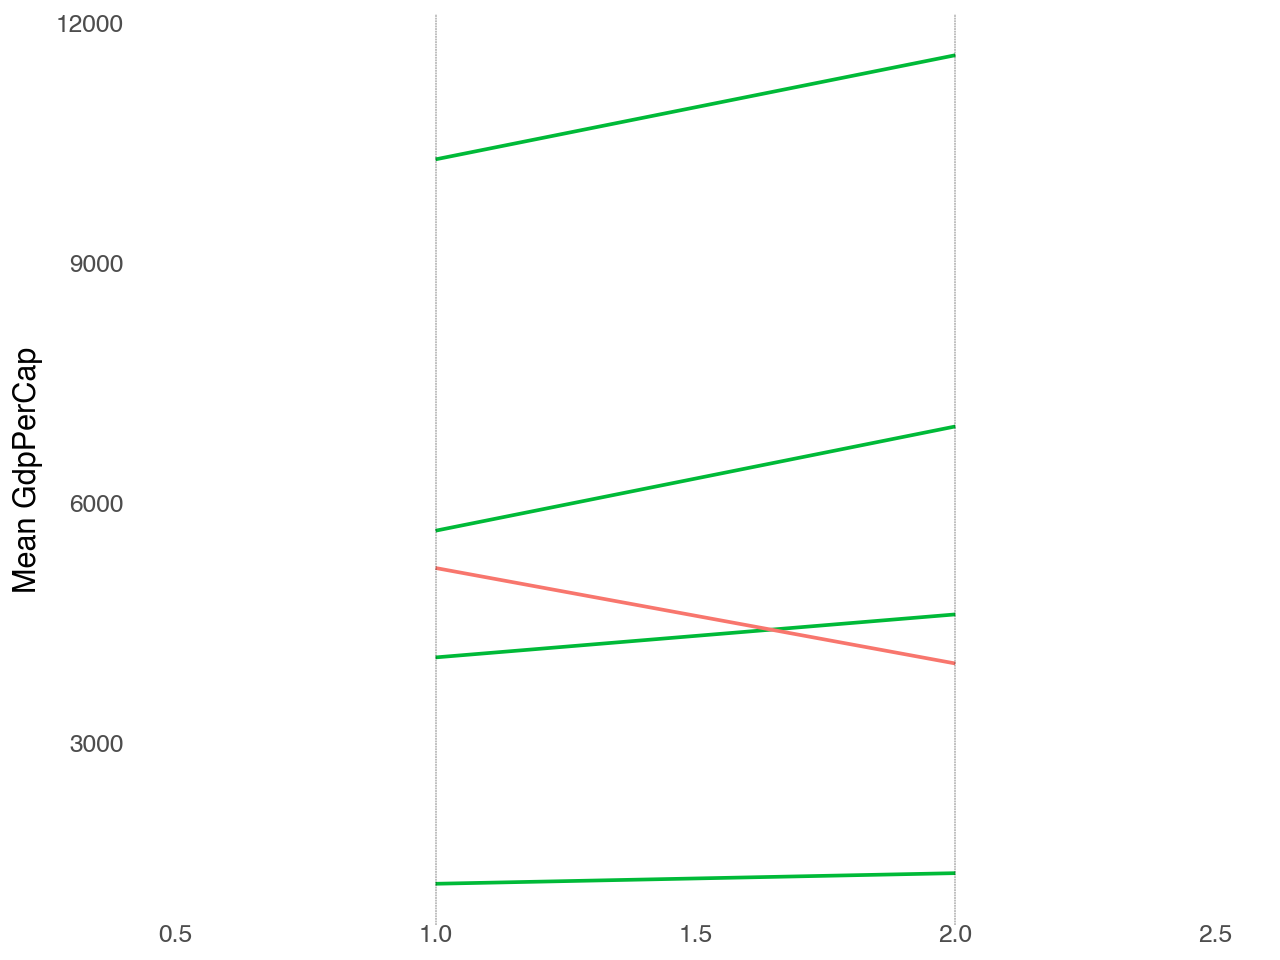

In [ ]:
p = (
    ggplot(gdp)
    + geom_segment(aes(x=1, xend=2, y="1952", yend="1957", color="class"), size=0.75)
    + geom_vline(xintercept=1, linetype="dashed", size=0.1)
    + geom_vline(xintercept=2, linetype="dashed", size=0.1)
    + scale_color_manual(
        labels=["Up", "Down"], values={"green": "#00ba38", "red": "#f8766d"}
    )
    + labs(x="", y="Mean GdpPerCap")
    + xlim(0.5, 2.5)
    + theme(
        panel_background=element_blank(),
        panel_grid=element_blank(),
        axis_ticks=element_blank(),
        # axis_text_x=element_blank(),
        panel_border=element_blank(),
        legend_position="none",
    )
)

p